In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import zipfile
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [4]:
# zip_path = "/content/gdrive/MyDrive/cats_vs_dogs.zip"
# extract_path = "/content/gdrive/MyDrive/cats_vs_dogs"

In [5]:
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

In [10]:
# Load the data
image_size = (224, 224)  # Resize images to 224x224
image_folder = "/content/gdrive/MyDrive/cats_vs_dogs/cats_vs_dogs"
images = []
labels = []

In [11]:
for filename in os.listdir(image_folder):
    if filename.startswith('cat'):
        label = 0
    elif filename.startswith('dog'):
        label = 1
    else:
        continue

    img_path = os.path.join(image_folder, filename)
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img)
    images.append(img_array)
    labels.append(label)


In [12]:
img_array.shape

(224, 224, 3)

In [13]:
len(images)

2000

In [14]:
len(labels)

2000

In [15]:
# Convert lists to numpy arrays
images = np.array(images, dtype='float32')
labels = np.array(labels, dtype='int32')

In [16]:
images.shape

(2000, 224, 224, 3)

In [17]:
labels.shape

(2000,)

images are typically represented as arrays of integers ranging from 0 to 255, which correspond to the intensity values of the pixels. Dividing by 255 scales these values to the range [0, 1].

In [18]:
# Normalize the images
images /= 255.0

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f'Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}')
print(f'Testing data shape: {test_images.shape}, Testing labels shape: {test_labels.shape}')

Training data shape: (1600, 224, 224, 3), Training labels shape: (1600,)
Testing data shape: (400, 224, 224, 3), Testing labels shape: (400,)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [20]:
model=Sequential()

model.add(Conv2D(filters=96,strides=(4,4),kernel_size=(11,11),padding='valid',input_shape=(224,224,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(filters=256,strides=(1,1),kernel_size=(5,5),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid')) # Here we will get two values because we used sigmoid

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 54, 54, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                        

In [23]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/10
50/50 [==============================] - 140s 3s/step - loss: 1.0527 - accuracy: 0.5200 - val_loss: 1.2516 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 140s 3s/step - loss: 0.6951 - accuracy: 0.5519 - val_loss: 0.7006 - val_accuracy: 0.4650
Epoch 3/10
50/50 [==============================] - 144s 3s/step - loss: 0.6778 - accuracy: 0.5725 - val_loss: 0.6966 - val_accuracy: 0.5250
Epoch 4/10
50/50 [==============================] - 139s 3s/step - loss: 0.6738 - accuracy: 0.5825 - val_loss: 0.6754 - val_accuracy: 0.5775
Epoch 5/10
50/50 [==============================] - 139s 3s/step - loss: 0.6719 - accuracy: 0.5931 - val_loss: 0.6723 - val_accuracy: 0.5900
Epoch 6/10
50/50 [==============================] - 135s 3s/step - loss: 0.6605 - accuracy: 0.6250 - val_loss: 0.7815 - val_accuracy: 0.5100
Epoch 7/10
50/50 [==============================] - 136s 3s/step - loss: 0.6511 - accuracy: 0.6225 - val_loss: 0.7231 - val_accuracy: 0.5725
Epoch 8/10
50

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

13/13 [==============================] - 7s 523ms/step - loss: 0.6661 - accuracy: 0.5925
Test accuracy: 0.5925


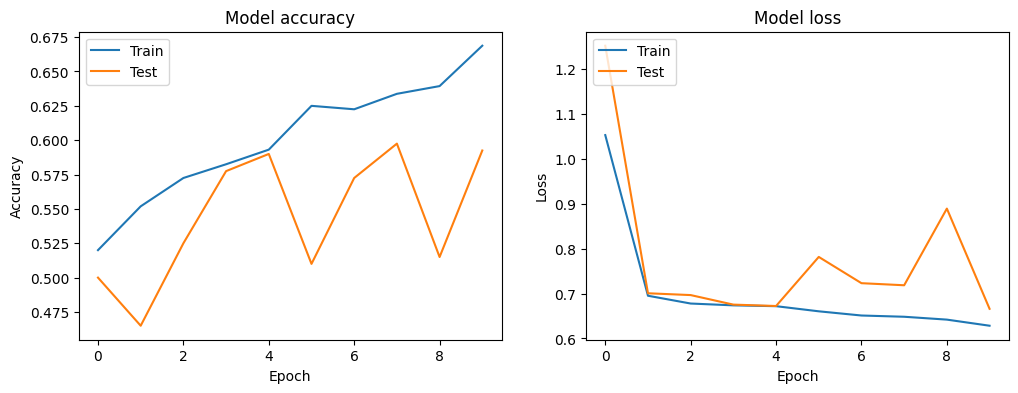

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

13/13 [==============================] - 9s 626ms/step


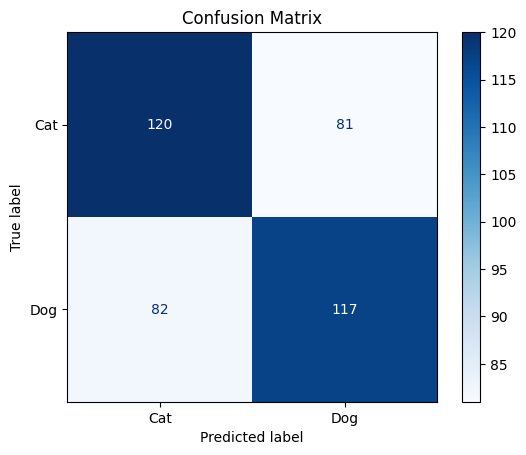

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate predictions
test_preds = (model.predict(test_images) > 0.5).astype("int32")

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()